<a href="https://colab.research.google.com/github/OmarAlsaqa/BloodCancer/blob/master/Copy_of_BloodCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import sys
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

In [0]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

%matplotlib inline

import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

import itertools

import keras
from keras import utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
from keras.layers import *
from keras import backend as K
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import activations
from keras.regularizers import l2
from keras.engine.topology import get_source_inputs



import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.


# **Unwanred** unless you want to change dim of photos

In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/cnmc-leukemia.zip'

Streaming output truncated to the last 5000 lines.
  inflating: fold_1/fold_1/all/UID_51_44_3_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_44_4_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_44_5_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_44_6_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_44_7_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_44_8_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_46_1_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_46_2_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_46_3_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_46_4_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_46_5_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_46_6_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_46_7_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_47_1_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_47_2_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_47_3_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_47_4_all.bmp  
  inflating: fold_1/fold_1/all/UID_51_47_5_all.b

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Cancer'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Streaming output truncated to the last 5000 lines.
/content/Cancer/fold_0/fold_0/all/UID_48_16_1_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_48_24_4_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_22_1_1_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_28_2_5_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_4_33_3_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_52_22_10_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_35_9_9_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_28_12_1_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_28_34_2_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_48_12_3_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_52_9_8_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_52_24_11_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_50_11_4_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_4_20_3_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_52_34_8_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_52_37_4_all.bmp
/content/Cancer/fold_0/fold_0/all/UID_20_10_2_all.bmp
/content/Cancer/fold_0/fold_0/all/U

In [0]:
x = []
for dirname, _, filenames in os.walk('/content/Cancer'):
    for filename in filenames:
        y = os.path.join(dirname, filename)
        x.append(y)

In [0]:
path = []
p_id = []
for i in x:
    path.append(i)
    p_id.append(i.split('/')[6][:-4])

In [0]:
s_id = []
img_is = []
c = []
lable = []
for i in x:
    v = i.split("_")
    s_id.append(v[3])
    img_is.append(v[4])
    c.append(v[5])
    lable.append(v[6][:-4])

In [0]:
data_tr = pd.DataFrame()
data_tr["Patient_ID"] = p_id
data_tr["path"] = path
data_tr['image'] = data_tr['path'].map(lambda x: np.asarray(Image.open(x).resize((224, 224))))
data_tr["subject_id"] = s_id
data_tr["image_id"] = img_is
data_tr["cell_no"] = c
data_tr["labels"] = lable
data_tr["labels"] = data_tr["labels"].apply(lambda x: 1 if x == 'all' else 0).astype(np.bool)

In [0]:
S_id = []
for i in s_id:
    if i[0] == 'H':
        S_id.append(i[1:])
    else:
        S_id.append(i)

In [0]:
data_tr["subject_id"] = S_id

In [0]:
data_tr["subject_id"] = data_tr["subject_id"].apply(lambda x: x[1:] if x[0] == "h" else x)

In [0]:
data_tr.sample(10)

,Patient_ID,path,image,subject_id,image_id,cell_no,labels
8394,UID_32_26_8_all,/content/Cancer/fold_1/fold_1/all/UID_32_26_8_...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",32,26,8,True
4384,UID_52_37_3_all,/content/Cancer/fold_0/fold_0/all/UID_52_37_3_...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",52,37,3,True
432,UID_18_24_2_all,/content/Cancer/fold_2/fold_2/all/UID_18_24_2_...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",18,24,2,True
4002,UID_28_2_6_all,/content/Cancer/fold_0/fold_0/all/UID_28_2_6_a...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",28,2,6,True
611,UID_78_14_4_all,/content/Cancer/fold_2/fold_2/all/UID_78_14_4_...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",78,14,4,True
3940,UID_45_2_1_all,/content/Cancer/fold_0/fold_0/all/UID_45_2_1_a...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",45,2,1,True
2081,UID_24_16_4_all,/content/Cancer/fold_2/fold_2/all/UID_24_16_4_...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",24,16,4,True
8683,UID_46_29_5_all,/content/Cancer/fold_1/fold_1/all/UID_46_29_5_...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",46,29,5,True
512,UID_67_3_1_all,/content/Cancer/fold_2/fold_2/all/UID_67_3_1_a...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",67,3,1,True
7183,UID_51_122_3_all,/content/Cancer/fold_1/fold_1/all/UID_51_122_3...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",51,122,3,True


In [0]:
data_tr["cell_no"] = data_tr["cell_no"].astype(np.int32)
data_tr["subject_id"] = data_tr["subject_id"].astype(np.int32)
data_tr["image_id"] = data_tr["image_id"].astype(np.int32)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10661 entries, 0 to 10660
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  10661 non-null  object
 1   path        10661 non-null  object
 2   image       10661 non-null  object
 3   subject_id  10661 non-null  int32 
 4   image_id    10661 non-null  int32 
 5   cell_no     10661 non-null  int32 
 6   labels      10661 non-null  bool  
dtypes: bool(1), int32(3), object(3)
memory usage: 385.3+ KB


In [0]:
X = data_tr.drop(["labels"], axis = 1)
y = data_tr["labels"]

In [0]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'XCan224.joblib'
y_name = 'yCan224.joblib'
save_dir = '/content/drive/My Drive/Colab Notebooks'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

# Visualization

In [0]:
plt.imshow(data_tr["image"][65])
plt.axis("off")

NameError: ignored

True     7272
False    3389
Name: labels, dtype: int64

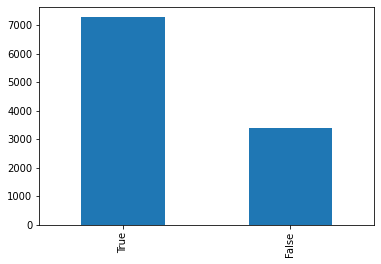

In [0]:
data_tr["labels"].value_counts().plot(kind = "bar")
data_tr["labels"].value_counts()

Text(0.5, 1.0, 'Subject Id distribution')

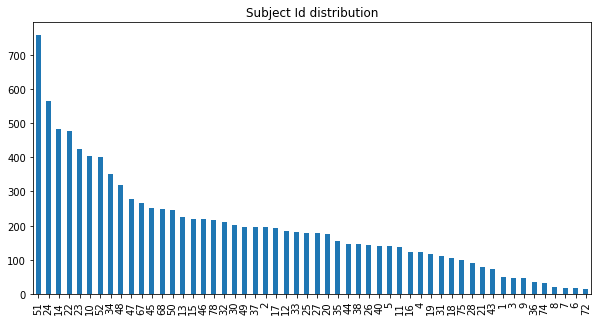

In [0]:
plt.rcParams['figure.figsize'] = [10, 5]
data_tr['subject_id'].value_counts().plot(kind = 'bar')
plt.title("Subject Id distribution")

# **Start here**

In [0]:
import joblib

X = joblib.load('/content/drive/My Drive/Colab Notebooks/XCan224.joblib')
y = joblib.load('/content/drive/My Drive/Colab Notebooks/yCan224.joblib')

%age of label value 0 in training dataset 0.31719043151969983
%age of label value 0 in test dataset 0.3206751054852321


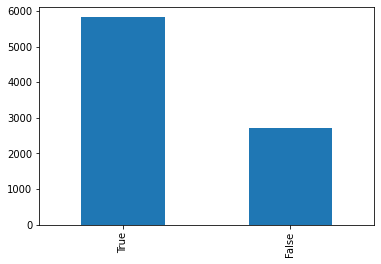

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

y_train.value_counts().plot(kind = "bar")

print("%age of label value 0 in training dataset", 
      y_train.value_counts()[0]/(y_train.value_counts()[0]+y_train.value_counts()[1]))

print("%age of label value 0 in test dataset", 
      y_test.value_counts()[0]/(y_test.value_counts()[0]+y_test.value_counts()[1]))

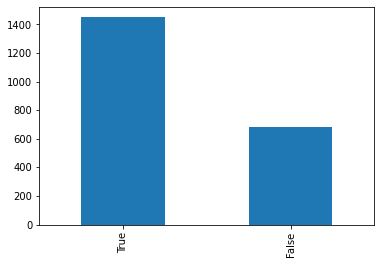

In [0]:
y_test.value_counts().plot(kind = "bar")

In [0]:
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

In [0]:
# Normalization

x_train_mean = np.mean(x_train)
x_test_mean = np.mean(x_test)

x_train_std = np.std(x_train)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

y_dopetest = y_test
# Label Encoding
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

# Reshape images in 3 dimensions
x_train = x_train.reshape(x_train.shape[0], *(224, 224, 3))
x_test = x_test.reshape(x_test.shape[0], *(224, 224, 3))

In [0]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 8528
number of test examples = 2133
X_train shape: (8528, 224, 224, 3)
Y_train shape: (8528, 2)
X_test shape: (2133, 224, 224, 3)
Y_test shape: (2133, 2)


# **CNN**

In [0]:
img_height,img_width = 224,224 
num_classes = 2

model = Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(265, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(265, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.9))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 128)     147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 265)       305545    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 265)      

In [0]:
# change the label_smoothing value (0.1 for example) and compare results  
def Loss_compute(y_true, y_pred, label_smoothing=0.2):
    loss = keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

In [0]:
from keras.optimizers import SGD, Adam
model.compile(optimizer=Adam(lr=0.0001), loss=Loss_compute, metrics=['accuracy'])

In [0]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  history = model.fit(x_train, y_train, validation_split=0.25, epochs=100, batch_size=32, verbose=1)

Train on 6396 samples, validate on 2132 samples
Epoch 1/100
6396/6396 [==============================] - 25s 4ms/step - loss: 0.6634 - accuracy: 0.6687 - val_loss: 0.6160 - val_accuracy: 0.6712
Epoch 2/100
6396/6396 [==============================] - 25s 4ms/step - loss: 0.6071 - accuracy: 0.7158 - val_loss: 0.5854 - val_accuracy: 0.8100
Epoch 3/100
6396/6396 [==============================] - 25s 4ms/step - loss: 0.5835 - accuracy: 0.7683 - val_loss: 0.5583 - val_accuracy: 0.8129
Epoch 4/100
6396/6396 [==============================] - 25s 4ms/step - loss: 0.5723 - accuracy: 0.7892 - val_loss: 0.5450 - val_accuracy: 0.8157
Epoch 5/100
6396/6396 [==============================] - 25s 4ms/step - loss: 0.5660 - accuracy: 0.7881 - val_loss: 0.5553 - val_accuracy: 0.8138
Epoch 6/100
6396/6396 [==============================] - 25s 4ms/step - loss: 0.5632 - accuracy: 0.7905 - val_loss: 0.5428 - val_accuracy: 0.8129
Epoch 7/100
6396/6396 [==============================] - 25s 4ms/step - loss

In [0]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2133/2133 [==============================] - 3s 2ms/step
Loss = 0.4315457243037459
Test Accuracy = 0.9123300313949585


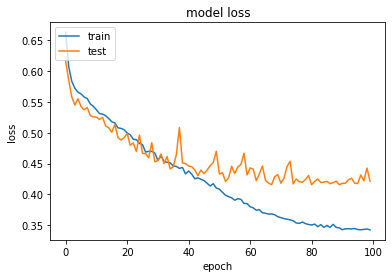

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

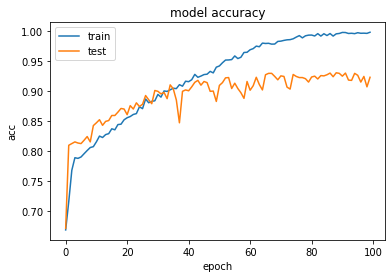

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict(x_test)
p = predictions.round()
y_pred = np.argmax(p, axis=1)
newY_test = np.argmax(y_test, axis=1)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(newY_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       684
           1       0.93      0.95      0.94      1449

    accuracy                           0.91      2133
   macro avg       0.90      0.89      0.90      2133
weighted avg       0.91      0.91      0.91      2133



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


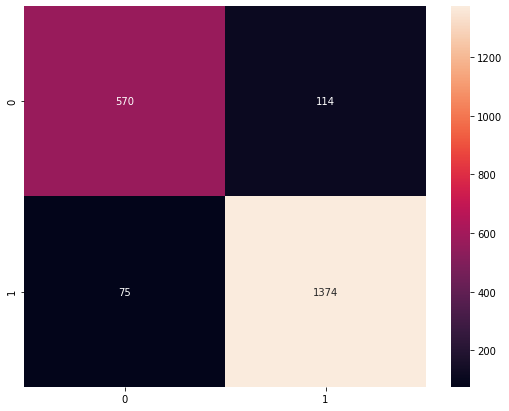

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(newY_test, y_pred)
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrix,index = [i for i in range(2)],columns = [i for i in range(2)])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True, fmt="d")

## ***ResNet152***

In [0]:
img_height,img_width = 224,224 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet_v2.ResNet152V2(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.9)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
import tensorflow as tf
with tf.device('/device:GPU:0'):     
    history = model.fit(x_train, y_train, validation_split=0.25, epochs = 50, batch_size = 32)

Train on 6396 samples, validate on 2132 samples
Epoch 1/50
6396/6396 [==============================] - 227s 35ms/step - loss: 0.7880 - accuracy: 0.7033 - val_loss: 5.7705 - val_accuracy: 0.3288
Epoch 2/50
6396/6396 [==============================] - 160s 25ms/step - loss: 0.5949 - accuracy: 0.7730 - val_loss: 0.4709 - val_accuracy: 0.7885
Epoch 3/50
6396/6396 [==============================] - 160s 25ms/step - loss: 0.4777 - accuracy: 0.8194 - val_loss: 0.5825 - val_accuracy: 0.7871
Epoch 4/50
6396/6396 [==============================] - 160s 25ms/step - loss: 0.4280 - accuracy: 0.8402 - val_loss: 0.4890 - val_accuracy: 0.7627
Epoch 5/50
6396/6396 [==============================] - 160s 25ms/step - loss: 0.3863 - accuracy: 0.8429 - val_loss: 1.9712 - val_accuracy: 0.7763
Epoch 6/50
6396/6396 [==============================] - 160s 25ms/step - loss: 0.3193 - accuracy: 0.8732 - val_loss: 1.0238 - val_accuracy: 0.6074
Epoch 7/50
6396/6396 [==============================] - 160s 25ms/step

In [0]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict(x_test)
p = predictions.round()
y_pred = np.argmax(p, axis=1)
newY_test = np.argmax(y_test, axis=1)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(newY_test, y_pred)
print(report)

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(newY_test, y_pred)
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrix,index = [i for i in range(2)],columns = [i for i in range(2)])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True, fmt="d")

## **ResNet50**

In [0]:
img_height,img_width = 128,128 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet_v2.ResNet50V2(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
import tensorflow as tf
with tf.device('/device:GPU:0'):     
    history = model.fit(x_train, y_train, validation_split=0.25, epochs = 25, batch_size = 32)

Train on 6396 samples, validate on 2132 samples
Epoch 1/25
6396/6396 [==============================] - 130s 20ms/step - loss: 0.5761 - accuracy: 0.7619 - val_loss: 1.5746 - val_accuracy: 0.3288
Epoch 2/25
6396/6396 [==============================] - 105s 16ms/step - loss: 0.5156 - accuracy: 0.7881 - val_loss: 0.4647 - val_accuracy: 0.7988
Epoch 3/25
6396/6396 [==============================] - 105s 16ms/step - loss: 0.4568 - accuracy: 0.8066 - val_loss: 0.5571 - val_accuracy: 0.8335
Epoch 4/25
6396/6396 [==============================] - 105s 16ms/step - loss: 0.4079 - accuracy: 0.8408 - val_loss: 0.8775 - val_accuracy: 0.5661
Epoch 5/25
6396/6396 [==============================] - 105s 16ms/step - loss: 0.3482 - accuracy: 0.8605 - val_loss: 0.3705 - val_accuracy: 0.8541
Epoch 6/25
6396/6396 [==============================] - 105s 16ms/step - loss: 0.2940 - accuracy: 0.8806 - val_loss: 0.9029 - val_accuracy: 0.7932
Epoch 7/25
6396/6396 [==============================] - 105s 16ms/step

KeyboardInterrupt: ignored

In [0]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict(x_test)

In [0]:
p = predictions.round()

In [0]:
y_pred = np.argmax(p, axis=1)

In [0]:
newY_test = np.argmax(y_test, axis=1)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(newY_test, y_pred)
print(report)

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(newY_test, y_pred)
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrix,index = [i for i in range(2)],columns = [i for i in range(2)])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True, fmt="d")

# InceptionV3

In [0]:
img_height,img_width = 128,128 
num_classes = 2

base_model = applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  history = model.fit(x_train, y_train, validation_split=0.25, epochs = 25, batch_size = 32)

Train on 6396 samples, validate on 2132 samples
Epoch 1/25
6396/6396 [==============================] - 115s 18ms/step - loss: 0.6287 - accuracy: 0.7419 - val_loss: 0.5860 - val_accuracy: 0.6848
Epoch 2/25
6396/6396 [==============================] - 87s 14ms/step - loss: 0.5027 - accuracy: 0.8008 - val_loss: 0.6300 - val_accuracy: 0.7097
Epoch 3/25
6396/6396 [==============================] - 88s 14ms/step - loss: 0.4556 - accuracy: 0.8301 - val_loss: 0.4074 - val_accuracy: 0.8311
Epoch 4/25
6396/6396 [==============================] - 88s 14ms/step - loss: 0.4032 - accuracy: 0.8518 - val_loss: 0.3694 - val_accuracy: 0.8471
Epoch 5/25
6396/6396 [==============================] - 88s 14ms/step - loss: 0.3487 - accuracy: 0.8629 - val_loss: 0.3824 - val_accuracy: 0.8405
Epoch 6/25
6396/6396 [==============================] - 88s 14ms/step - loss: 0.3087 - accuracy: 0.8835 - val_loss: 0.3880 - val_accuracy: 0.8701
Epoch 7/25
6396/6396 [==============================] - 88s 14ms/step - los

In [0]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2133/2133 [==============================] - 10s 5ms/step
Loss = 0.6648980871758101
Test Accuracy = 0.8682606816291809


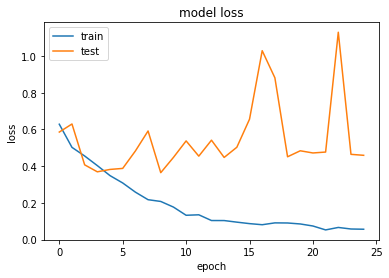

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

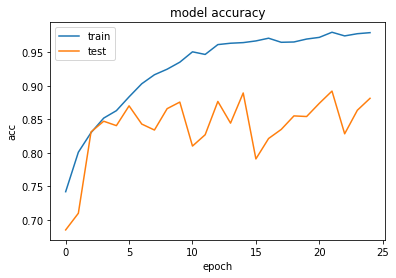

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict(x_test)

In [0]:
p = predictions.round()

In [0]:
y_pred = np.argmax(p, axis=1)

In [0]:
newY_test = np.argmax(y_test, axis=1)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(newY_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.68      0.77       684
           1       0.86      0.96      0.91      1449

    accuracy                           0.87      2133
   macro avg       0.87      0.82      0.84      2133
weighted avg       0.87      0.87      0.86      2133



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


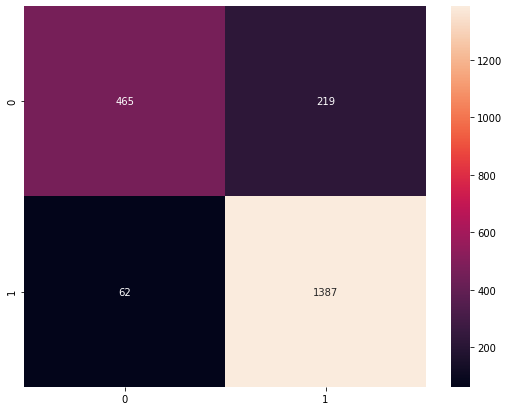

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(newY_test, y_pred)
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrix,index = [i for i in range(2)],columns = [i for i in range(2)])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True, fmt="d")

# VGG19

In [0]:
img_height,img_width = 224,224 
num_classes = 2

base_model = applications.vgg19.VGG19(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss=Loss_compute, metrics=['accuracy'])

In [0]:
import tensorflow as tf
with tf.device('/device:GPU:0'):
  history = model.fit(x_train, y_train, validation_split=0.25, epochs = 25, batch_size = 32)

Train on 6396 samples, validate on 2132 samples
Epoch 1/25
6396/6396 [==============================] - 67s 10ms/step - loss: 0.6044 - accuracy: 0.6929 - val_loss: 0.5568 - val_accuracy: 0.7566
Epoch 2/25
6396/6396 [==============================] - 62s 10ms/step - loss: 0.5553 - accuracy: 0.7791 - val_loss: 0.4932 - val_accuracy: 0.8236
Epoch 3/25
6396/6396 [==============================] - 62s 10ms/step - loss: 0.5174 - accuracy: 0.8085 - val_loss: 0.5167 - val_accuracy: 0.8288
Epoch 4/25
6396/6396 [==============================] - 62s 10ms/step - loss: 0.4940 - accuracy: 0.8189 - val_loss: 0.4783 - val_accuracy: 0.8133
Epoch 5/25
6396/6396 [==============================] - 62s 10ms/step - loss: 0.4806 - accuracy: 0.8204 - val_loss: 0.4592 - val_accuracy: 0.8471
Epoch 6/25
6396/6396 [==============================] - 62s 10ms/step - loss: 0.4668 - accuracy: 0.8343 - val_loss: 0.4451 - val_accuracy: 0.8447
Epoch 7/25
6396/6396 [==============================] - 62s 10ms/step - loss

In [0]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2133/2133 [==============================] - 8s 4ms/step
Loss = 0.3825329846610388
Test Accuracy = 0.9006094932556152


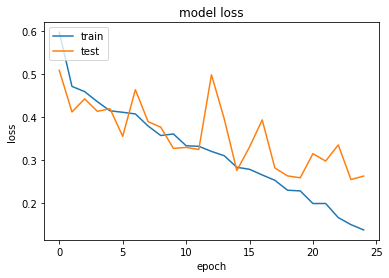

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

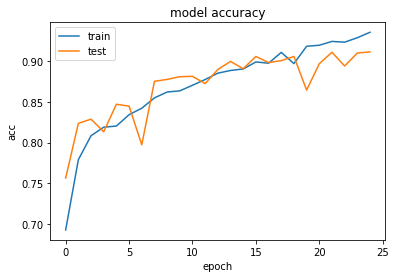

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict(x_test)

In [0]:
p = predictions.round()

In [0]:
y_pred = np.argmax(p, axis=1)

In [0]:
newY_test = np.argmax(y_test, axis=1)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(newY_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       684
           1       0.92      0.94      0.93      1449

    accuracy                           0.90      2133
   macro avg       0.89      0.88      0.88      2133
weighted avg       0.90      0.90      0.90      2133



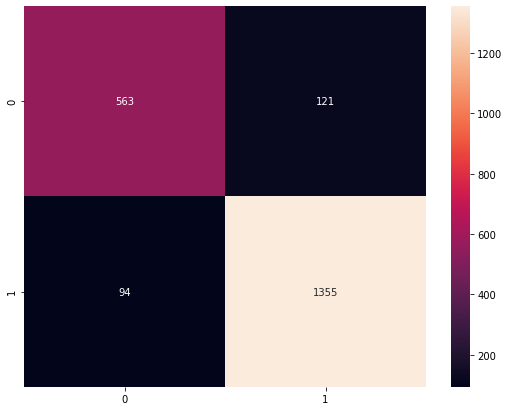

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(newY_test, y_pred)
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrix,index = [i for i in range(2)],columns = [i for i in range(2)])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True, fmt="d")

# VGG16
with Augmentation

In [0]:
img_height,img_width = 224,224 
num_classes = 2

base_model = applications.vgg16.VGG16(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
base_model.trainable = False
x = base_model.get_layer('block5_pool')
#x = base_model.output
#x = GlobalAveragePooling2D()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(2, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

ValueError: ignored

In [0]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0005)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

# **Augmentation**

In [0]:
del X
del y

In [0]:
from keras.preprocessing.image import ImageDataGenerator
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

train_generator = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	                                  width_shift_range=0.2, height_shift_range=0.2, shear_range=0.05,
	                                  horizontal_flip=True, fill_mode="nearest")

test_generator = ImageDataGenerator()

train_generator.fit(x_train, augment=True)
train_generator = train_generator.flow(x_train, #np.array(x_train)
                                       y_train,
                                       batch_size = 32)

test_generator = test_generator.flow(x_test, #np.array(x_test)
                                     y_test,
                                     batch_size = 32)

In [0]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.95):
      print("\nReached more than 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
history = model.fit_generator(train_generator, epochs = 50, verbose=1, validation_data=(x_val, y_val), callbacks=[callbacks])

Epoch 1/50
200/200 [==============================] - 208s 1s/step - loss: 0.6343 - accuracy: 0.6757 - val_loss: 0.6132 - val_accuracy: 0.6993
Epoch 2/50
200/200 [==============================] - 206s 1s/step - loss: 0.6308 - accuracy: 0.6773 - val_loss: 0.6132 - val_accuracy: 0.6993
Epoch 3/50
199/200 [============================>.] - ETA: 0s - loss: 0.6295 - accuracy: 0.6776

KeyboardInterrupt: ignored

In [0]:
print("Test_Accuracy(after augmentation): {:.2f}%".format(model.evaluate_generator(test_generator, steps = len(x_test), verbose = 1)[1]*100))

2133/2133 [==============================] - 166s 78ms/step
Test_Accuracy(after augmentation): 77.54%


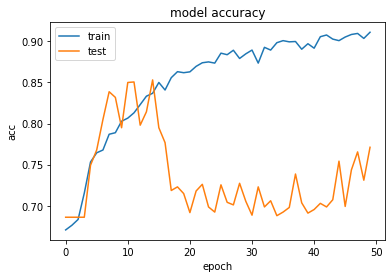

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict_generator(test_generator, verbose=1)
p = predictions.round()
y_pred = np.argmax(p, axis=1)

newY_test = np.argmax(y_test, axis=1)

67/67 [==============================] - 6s 91ms/step


In [0]:
y_pred[:5]

array([0, 1, 1, 0, 1])

In [0]:
len(y_pred), len(newY_test)

(2133, 2133)

In [0]:
from sklearn.metrics import classification_report
report = classification_report(newY_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.66      0.79       684
           1       0.86      0.99      0.92      1449

    accuracy                           0.89      2133
   macro avg       0.92      0.83      0.86      2133
weighted avg       0.90      0.89      0.88      2133



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


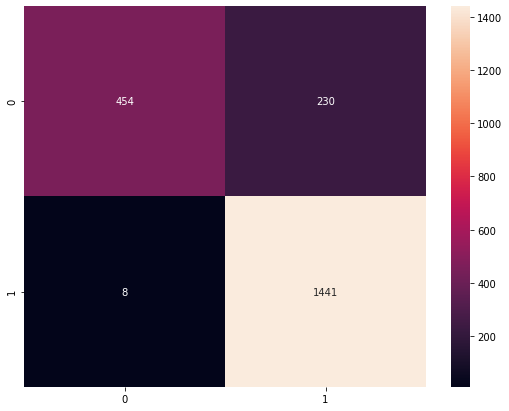

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(newY_test, y_pred)
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(matrix,index = [i for i in range(2)],columns = [i for i in range(2)])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [0]:
model_name = 'VGG19Drop9Epoch50Size224_224AUGMENTED.h5'
save_dir = '/content/drive/My Drive/Colab Notebooks'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Colab Notebooks/VGG19Drop9Epoch50Size224_224AUGMENTED.h5 


In [0]:
model_name = 'VGG19Drop9Epoch50Size224_224.h5'
save_dir = '/content/drive/My Drive/Colab Notebooks'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Colab Notebooks/VGG19Drop9Epoch50Size224_224.h5 
